In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


with open("/content/kddcup.names", 'r') as f:
	print(f.read())


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
cols = """duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns = []
for c in cols.split(','):
    if c.strip():
        columns.append(c.strip())

columns.append('target')
print(len(columns))


42


In [ ]:

with open("/content/training_attack_types", 'r') as f:
	print(f.read())


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:

attacks_types = {
	'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [ ]:
path = "/content/kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns)


df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:

df.shape


(494021, 43)

In [ ]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols



['protocol_type', 'flag', 'service']

In [ ]:
df = df.dropna(axis=1)

df = df[[col for col in df if df[col].nunique() > 1]]

In [ ]:
df.drop('num_root', axis = 1, inplace = True)


df.drop('srv_serror_rate', axis = 1, inplace = True)


df.drop('srv_rerror_rate', axis = 1, inplace = True)


df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [ ]:
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)


In [ ]:
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)



In [ ]:

df.drop('service', axis = 1, inplace = True)


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [ ]:


df = df.drop(['target', ], axis = 1)
print(df.shape)


y = df[['Attack Type']]
X = df.drop(['Attack Type', ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Decision Tree
clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
print("Decision Tree:")
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

y_pred_dt = clfd.predict(X_test)
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_pred_dt))

print(classification_report(y_test, y_pred_dt))

# Random Forest
clfr = RandomForestClassifier(n_estimators=30)
print("\nRandom Forest:")
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))

y_pred_rf = clfr.predict(X_test)
print('Accuracy of Random Forest: ', accuracy_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

# Naive Bayes
clfg = GaussianNB()
print("\nNaive Bayes:")
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))

y_pred_nb = clfg.predict(X_test)
print('Accuracy of Naive Bayes: ', accuracy_score(y_test, y_pred_nb))

print(classification_report(y_test, y_pred_nb))


Decision Tree:
Training time:  1.3685224056243896
Train score is: 0.9905829108684749
Test score is: 0.9905230421954646
Accuracy of Decision Tree:  0.9905230421954646


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      0.98      0.98     32167
       probe       0.56      0.89      0.68      1348
         r2l       0.00      0.00      0.00       387
         u2r       0.00      0.00      0.00        19

    accuracy                           0.99    163027
   macro avg       0.51      0.57      0.53    163027
weighted avg       0.99      0.99      0.99    163027


Random Forest:
Training time:  22.88485312461853
Train score is: 0.99997583037759
Test score is: 0.999650364663522
Accuracy of Random Forest:  0.999650364663522
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       1.00      0.99      0.99      1348
         r2l       0.99      0.95      0.97       387
         u2r       0.92      0.63      0.75        19

    accuracy           

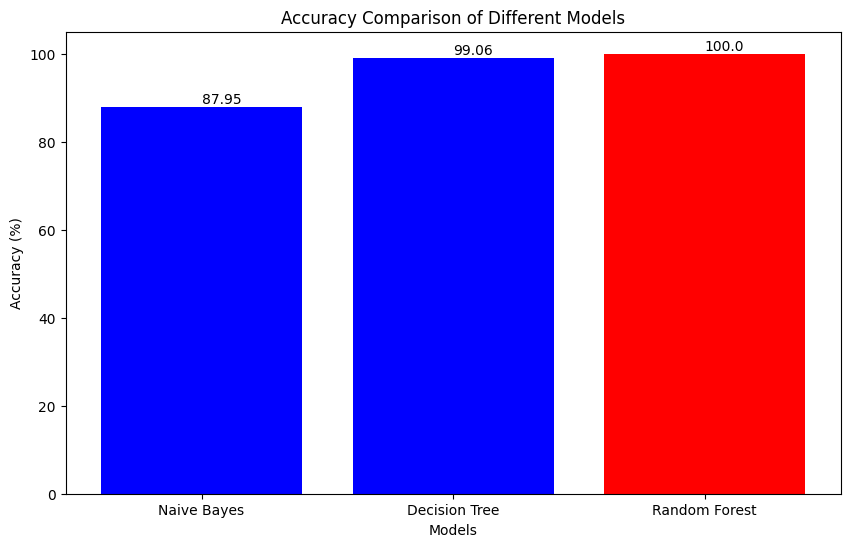

In [ ]:
import matplotlib.pyplot as plt

names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
values = [87.951, 99.058, 99.997]

max_index = values.index(max(values))

plt.figure(figsize=(10, 6))

bars = plt.bar(names, values, color=['red' if i == max_index else 'blue' for i in range(len(names))])


plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


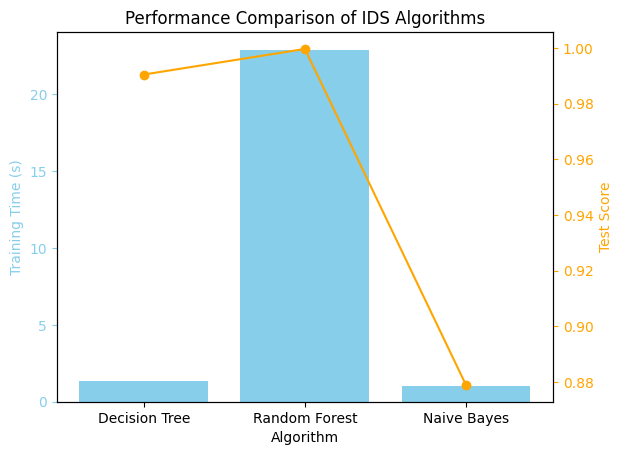

In [1]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Decision Tree', 'Random Forest', 'Naive Bayes']

# Training times (in seconds)
training_times = [1.37, 22.88, 0.999]

# Test scores
test_scores = [0.9905, 0.9997, 0.8790]

# Create subplots
fig, ax1 = plt.subplots()

# Bar plot for training times
ax1.bar(algorithms, training_times, color='skyblue')
ax1.set_xlabel('Algorithm')
ax1.set_ylabel('Training Time (s)', color='skyblue')
ax1.tick_params('y', colors='skyblue')

# Create a second y-axis for test scores
ax2 = ax1.twinx()
ax2.plot(algorithms, test_scores, color='orange', marker='o')
ax2.set_ylabel('Test Score', color='orange')
ax2.tick_params('y', colors='orange')

# Title
plt.title('Performance Comparison of IDS Algorithms')

# Show plot
plt.show()


Here this is the test on Kdd cup 1999 , here we have used 3 classfication models thoes are Navie Bayes and Descion Tree and Random Forest out of all this three Random Forest showed the best results and highest accurcay and the papers we are used for our refernce are

Intrusion Detection System using Machine learning Techniques : A Review

